<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/GMMPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [252]:
dfWithTargets = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/Iris.csv')

In [253]:
dfWithTargets.drop

<bound method DataFrame.drop of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]>

In [254]:
dfWithTargets = dfWithTargets.drop(columns=['Id'])

In [255]:
df = dfWithTargets[dfWithTargets.columns[:-1]]

In [256]:
from sklearn.mixture import GaussianMixture

In [257]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(df)

GaussianMixture(n_components=3, n_init=10)

In [154]:
gm.weights_

array([0.36548058, 0.33333333, 0.30118609])

In [155]:
gm.means_

array([[6.54632887, 2.94943079, 5.4834877 , 1.98716063],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.91697517, 2.77803998, 4.20523542, 1.29841561]])

In [156]:
gm.covariances_

array([[[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]],

       [[0.121765  , 0.098292  , 0.015816  , 0.010336  ],
        [0.098292  , 0.142277  , 0.011448  , 0.011208  ],
        [0.015816  , 0.011448  , 0.029505  , 0.005584  ],
        [0.010336  , 0.011208  , 0.005584  , 0.011265  ]],

       [[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]]])

In [157]:
gm.converged_

True

In [158]:
gm.n_iter_

17

In [258]:
predict = gm.predict(df)

In [160]:
gm.predict_proba(df).round(2)

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
 

In [161]:
X_new, y_new = gm.sample(6)

In [162]:
X_new

array([[7.00861386, 3.02297563, 6.1877206 , 2.37039503],
       [7.17012812, 2.67430715, 5.60628307, 1.74916359],
       [4.67161423, 2.88211043, 1.43414461, 0.21134409],
       [5.38203633, 3.49393649, 1.68760305, 0.21698216],
       [5.49015015, 2.36964815, 3.82684665, 1.22041271],
       [6.04590575, 2.95879881, 4.49229314, 1.29552722]])

In [163]:
y_new

array([0, 0, 1, 1, 2, 2])

In [164]:
from matplotlib.colors import LogNorm

In [165]:
import matplotlib.pyplot as plt

In [166]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [167]:
def plot_gaussian_mixture(clusterer, X, x1, x2, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    X_np = X.values
    plt.plot(X_np[:, 0], X_np[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel(x1)
    if show_ylabels:
        plt.ylabel(x2, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [186]:
df2Features = df[['SepalLengthCm', 'SepalWidthCm']]

In [187]:
gm2 = GaussianMixture(n_components=3, n_init=10)

In [188]:
gm2.fit(df2Features)

GaussianMixture(n_components=3, n_init=10)

In [242]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<ipython-input-167-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-167-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.war

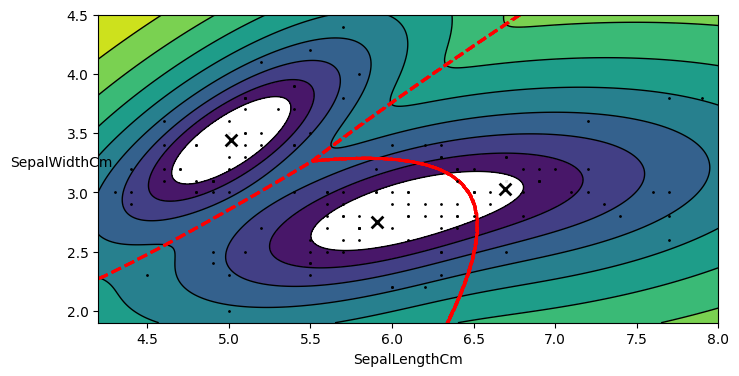

In [189]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm2, df2Features, 'SepalLengthCm', 'SepalWidthCm')

plt.show()

In [172]:
pdf = pd.read_csv('https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv')

In [173]:
pdf

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [174]:
pdf2Features = pdf[['bill_length_mm', 'bill_depth_mm']]
pdf2Features = pdf2Features.dropna()

In [175]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(pdf2Features)

GaussianMixture(n_components=3, n_init=10)

In [176]:
plot_gaussian_mixture(gm, pdf2Features, )
plt.show()

TypeError: plot_gaussian_mixture() missing 2 required positional arguments: 'x1' and 'x2'

# k-means

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [178]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [179]:
# return random sample of k initial centroids
def get_random_centroids(df, k):
    return df.sample(k)[df.columns[:-1]]

In [180]:
# compare old centroids to new centroids to see if the algorithm has converged yet
# return true if new_centroids is equal to old_centroids, false otherwise
def check_new_centroids(old_centroids, new_centroids):
    if old_centroids.empty:
        return False  # Return False at start of loop
    return np.allclose(old_centroids.values, new_centroids.values, atol=0.001)

In [181]:
def update_centroids(df):
    return df.groupby("current_cluster").mean()[df.columns[:-1]]

In [194]:
# plot data and centroids for each iteration
def plot_clusters(df, centroids, iteration,):
    plt.figure(figsize=(5, 3))

    # Plot each cluster
    sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = "current_cluster");
    # sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = df, hue = "current_cluster");

    # Plot the centroids
    plt.scatter(
        centroids["SepalLengthCm"], centroids["SepalWidthCm"],
        color="red", marker="X", s=200, label="Centroids"
    )
    # plt.scatter(
    #     centroids["bill_length_mm"], centroids["bill_depth_mm"],
    #     color="red", marker="X", s=200, label="Centroids"
    # )

    plt.title(f'Iteration {iteration}')
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")
    # plt.xlabel("bill length (mm)")
    # plt.ylabel("bill depth (mm)")
    plt.legend()
    plt.show()
    plt.pause(1)
    clear_output(wait=True)


In [221]:
def get_cluster(df, centroids, plot=True):
    # initialize old centroids as an empty dataframe
    old_centroids = pd.DataFrame()
    # keep track of what iteration we are on for plotting
    iteration = 0
    # run iteratively while the new centroids are different from the old ones
    while not check_new_centroids(old_centroids, centroids):
        # update the old centroids
        old_centroids = centroids.copy()
        # iterate over each point in the data frame
        for i in df.index:
            # store distances from current point to each centroid
            distances = []
            # iterate over each centroid
            for _, centroid in centroids.iterrows():
                # calculate euclidean distance from current point to current centroid
                distances.append(euclidean_distance(df.loc[i, df.columns[:-1]], centroid))
            # assign the point to the cluster with the closest centroid
            closest_cluster = np.argmin(distances)
            df.loc[i, 'current_cluster'] = closest_cluster

        if plot:
          # plot clusters and centroids
          plot_clusters(df, centroids, iteration)
        #update centroids
        centroids = update_centroids(df)
        iteration += 1
    return centroids, df
    # # plot clusters and centroids
    plot_clusters(df, centroids, iteration)


In [201]:
def initialize_centroids(df, k):
    # initialize list to hold k centroids
    centroids = []
    # randomly select first centroid
    first_centroid = df.sample(1).iloc[0]
    # add it to the centroid list
    centroids.append(first_centroid)
    # get remaining k-1 centroids
    for i in range(1, k):     # k is exclusive
        # initialize list to hold distances from new centroids to the first centroid
        distances = []
        # loop through each point in the data frame
        for i in df.index:
            point = df.loc[i, df.columns[:-1]]
            # Calculate the distance from the current point to each centroid
            min_distance = min(euclidean_distance(point, centroid) for centroid in centroids)
            distances.append(min_distance**2)  # Append squared distance
        # compute probabilities
        probabilities = distances / np.sum(distances)
        # select new centroid
        new_centroid = df.sample(1, weights=probabilities).iloc[0]
        # add new centroid to list
        centroids.append(new_centroid)

    return pd.DataFrame(centroids, columns=df.columns[:-1])

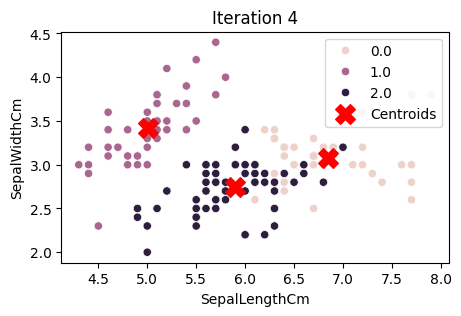

In [222]:
centroids, df = get_cluster(df, initialize_centroids(df, 3), plot=True)

<ipython-input-167-995b330eb590>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-167-995b330eb590>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.war

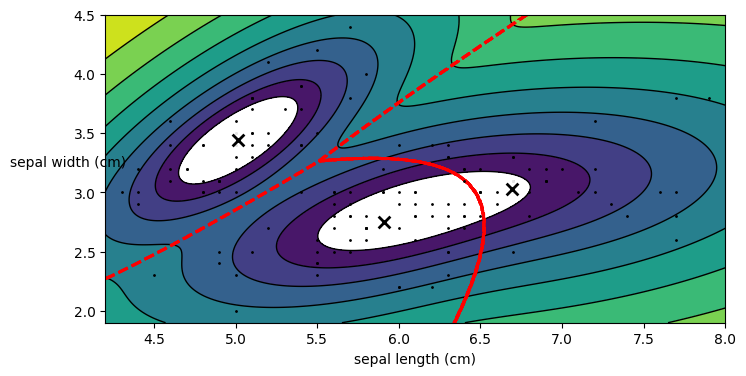

In [204]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm2, df2Features, 'sepal length (cm)', 'sepal width (cm)')

plt.show()

In [205]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(df2Features)

GaussianMixture(n_components=3, n_init=10)

In [207]:
means = gm.means_

In [214]:
centroids

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
current_cluster,,,,
0.0,5.006000,3.418000,1.464000,0.244000
1.0,5.883607,2.740984,4.388525,1.434426
2.0,6.853846,3.076923,5.715385,2.053846


In [216]:
centroidValues = centroids[['SepalLengthCm', 'SepalWidthCm']].values
centroidValues

array([[5.006     , 3.418     ],
       [5.88360656, 2.74098361],
       [6.85384615, 3.07692308]])

In [217]:
means

array([[5.90652226, 2.74740414],
       [6.69225795, 3.03018616],
       [5.01494511, 3.44040237]])

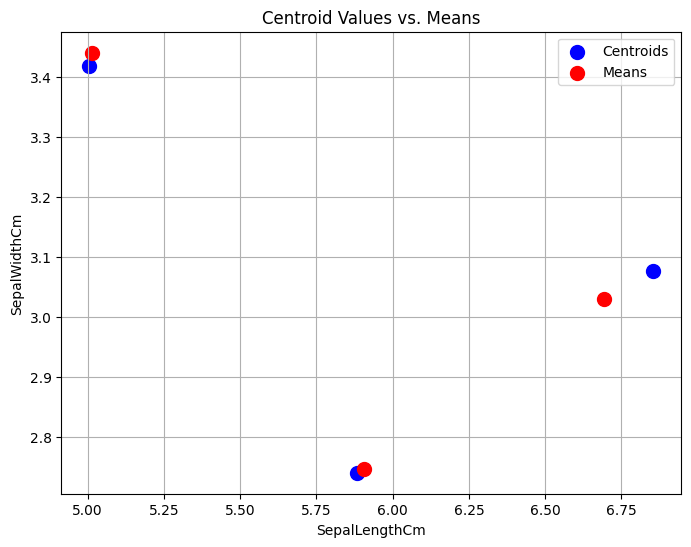

In [219]:

plt.figure(figsize=(8, 6))

plt.scatter(centroidValues[:, 0], centroidValues[:, 1], color='blue', label='Centroids', s=100)

plt.scatter(means[:, 0], means[:, 1], color='red', label='Means', s=100)

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Centroid Values vs. Means')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
def calculate_accuracy(df, clustered_df, target):
    accuracy = 0
    for i in df.index:
        if df.loc[i, target] == clustered_df.loc[i, 'current_cluster']:
            accuracy += 1
    return accuracy / len(df)

In [225]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,current_cluster
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


In [226]:
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [248]:
target_names = {
    "Iris-setosa": 1.0,
    "Iris-versicolor": 0.0,
    "Iris-virginica": 2.0,
}

dfWithTargets["species_name"] = dfWithTargets["Species"].map(target_names)
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_name
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [236]:
calculate_accuracy(dfWithTargets, df, 'species_name')

0.8933333333333333

GaussianMixture(n_components=3, n_init=10)

In [259]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [260]:
predicteddf = pd.DataFrame(predict, columns=['current_cluster'])

In [261]:
predicteddf

,current_cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,0
147,0
148,0


In [264]:
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [269]:
target_names = {
    "Iris-setosa": 1.0,
    "Iris-versicolor": 2.0,
    "Iris-virginica": 0.0,
}

dfWithTargets["species_name"] = dfWithTargets["Species"].map(target_names)
dfWithTargets

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_name
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0
146,6.3,2.5,5.0,1.9,Iris-virginica,0.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0


In [270]:
calculate_accuracy(dfWithTargets, predicteddf, 'species_name')

0.9666666666666667